# [Huggingface Transformer란?](https://huggingface.co/docs/transformers/index)

- 인공신경망 알고리즘은 크게, 합성곱 신경망(CNN), 순환 신경망(RNN), 트랜스포머(Transformer) 3가지로 나눠집니다.
- 이 중 트랜스포머는, 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로,
- 셀프 에텐션(Self-Attention)이라는 방식을 사용하는 모델입니다.
- 트랜스포머는, 이러한 어텐션 방식을 사용해, 문장 전체를 병렬구조로 번역할 뿐만 아니라, 멀리 있는 단어까지도 연관성을 만들어 유사성을 높였으며, RNN의 한계를 극복했습니다.
- 또한, 이미지나 언어 번역에 폭넓게 쓰이고 있으며, GPT-3, BERT 등이 가장 관심을 많이 받고 있는 모델입니다.

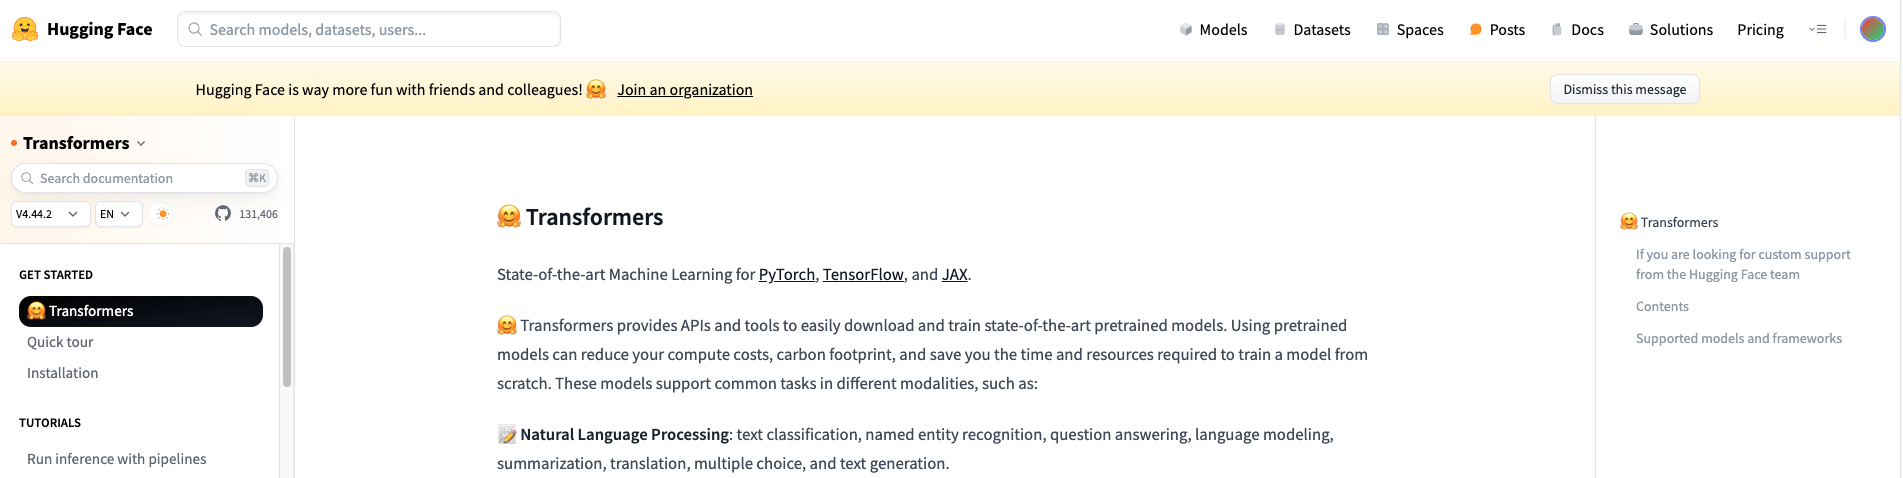

## transformers.models
- 트랜스포머 기반의 다양한 모델을 pytorch, tensorflow 로 각각 구현해놓은 모듈입니다.
- 각 모델에 맞는 tokenizer 도 구현되어 있습니다.

## transformers.pipeline
- pipeline()을 사용하면 언어, 컴퓨터 비전, 오디오 및 멀티모달 태스크에 대한 추론을 할 수 있습니다.

## transformers.Trainer
- 딥러닝 학습 및 평가에 필요한 optimizer, weight updt, learning rate schedul, ckpt, tensorbord, evaluation 등을 수행하는 모듈입니다.
- Trainer.train 함수를 호출하면, 이 모든 과정이, 사용자가 원하는 arguments에 맞게 실행됩니다.
- pytorch lightning 과 비슷하게, 공통적으로 사용되는 학습 스크립트를 모듈화 하여 편하게 사용할 수 있다는 점이 장점입니다.

# [Transformer](https://huggingface.co/learn/nlp-course/ko/chapter1/4?fw=pt)

## 트랜스포머 역사

Transformer architecture는 2017년 6월에 처음 소개되었습니다. 처음 연구 목적은 번역 작업 수행이었습니다. 이후로 다음과 같이 줄줄이 막강한 모델들이 세상에 등장했습니다:
- `2018년 6월`: GPT, 최초로 사전 학습된 트랜스포머 모델로 다양한 NLP 작업에 미세 조정(fine-tune)되도록 사용되었으며 SOTA(state-of-the-art) 성능 달성
- `2018년 10월`: BERT, 또 다른 거대 사전 학습 언어 모델로, 더 좋은 문장 요약을 위해 설계 (이번 단원과 다음 단원에서 더 자세히 알아봐요!)
- `2019년 2월`: GPT-2, 더 좋은 성능(그리고 더 큰) 버전의 GPT로, 윤리적 문제로 인해 즉시 공개되지 못하였음
- `2019년 10월`: DistilBERT, BERT의 60% 빠른 속도에 메모리 측면에서 40% 가볍지만 BERT 성능의 97%를 재현하는 경량화 버전의 BERT
- `2019년 10월`: BART 와 T5, 동일한 구조의 (처음으로) 원본 트랜스포머 모델의 구조를 그대로 따른 두 거대 사전학습 언어 모델
- `2020년 5월`: GPT-3, 미세 조정 없이도 (zero-shot learning이라 부름) 다양한 작업을 훌륭하게 수행하는 GPT-2의 더 큰 버전

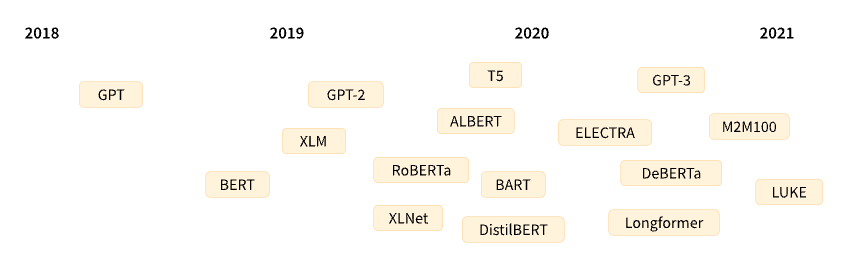

## 트랜스포머 학습방법

- 위에 언급한 모델(GPT, BERT, BART, T5 등)들은 언어 모델(language model)로서 학습 되었습니다. 다르게 말하면 이 모델들은 스스로 지도하는 방식으로 수많은 텍스트에 대해 학습된 모델들입니다. 이러한 자가 지도 학습(self-supervised learning)은 학습의 목적이 모델 입력으로부터 자동으로 계산되는 방식을 말합니다. `결국 사람이 데이터에 레이블을 달지 않아도 학습이 가능한 것입니다!`
- 이러한 종류의 모델은 학습한 언어에 대해 통계 기반의 방식으로 이해를 하지만, 이는 몇몇 실생활 문제에 적합하지 않습니다. 그렇기 때문에 사전 학습된 모델은 `전이 학습(transfer learning)`이라 불리는 과정을 거칩니다. 이 과정에서 모델은 특정 작업에 맞춰 지도적(supervised)인 방법, 즉 사람이 레이블을 추가한 데이터를 사용하는 방법으로 `미세 조정(fine-tune)`이 이루어지는 단계를 거칩니다.

### Causal Language Modeling
- 하나의 예시로 문장 내에서 이전 n개의 단어를 읽고 다음에 올 단어를 에측하는 문제를 들 수 있습니다.
- 이를 과거와 현재의 입력 정보를 이용하는 방식(미래에 올 입력 정보는 이용하지 않습니다)이기 때문에 인과적 언어 모델링(causal language modeling)이라고 부릅니다.

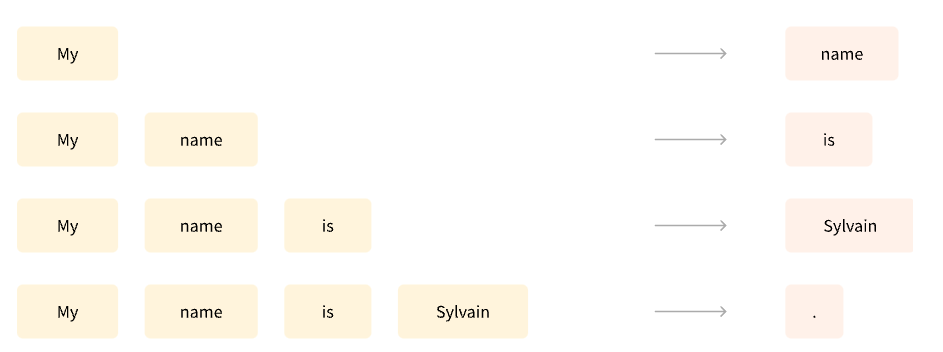

### Masked Language Modeling
- 다른 예시로 마스크 언어 모델링(masked language modeling)을 들 수 있습니다. 여기서 모델은 문장 내에 마스킹 된 단어를 예측합니다.

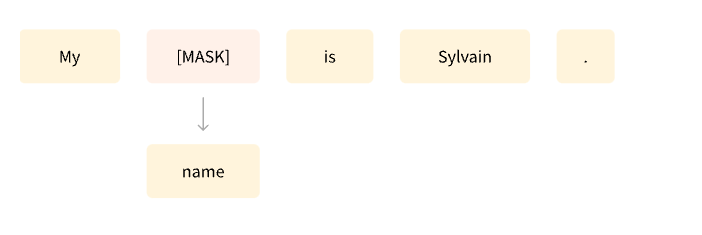

### Pretraining
- 사전 학습(Pretraining)시에는 모델을 밑바닥부터 학습시키게 됩니다. 모델 가중치를 랜덤하게 초기화하고 사전 지식 없이 학습을 시작합니다.
- 이러한 사전 학습 과정은 엄청난 양의 데이터로 이루어지기 때문에 방대한 양의 코퍼스 데이터와 수 주 씩 걸리는 학습 시간을 필요로 하기도 합니다.

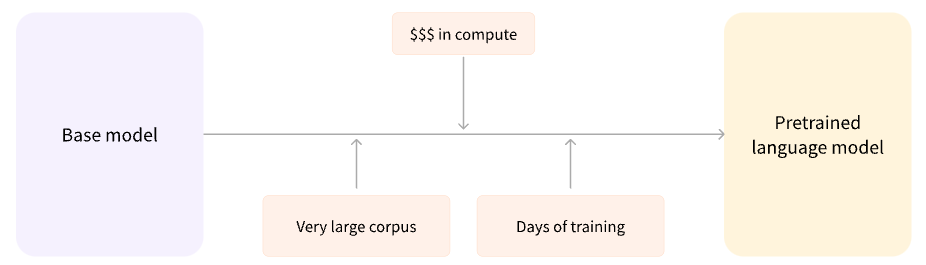

### Fine-tuning
반면에 미세 조정(Fine-tuning)이란 모델이 모두 사전 학습을 마친 이후에 하는 학습을 의미합니다. 미세 조정을 하기 위해서 우선 사전 학습된 언어 모델을 가져오고, 여러분이 할 작업에 특화된 데이터셋을 이용해 추가 학습을 수행합니다. 잠깐만요, 그냥 한번에 최종 태스크에 맞춰 학습시키면 안될까요? 이렇게 하는 데에는 몇 가지 이유가 있습니다:
- 사전 학습된 모델은 이미 미세 조정 데이터셋과 유사한 데이터셋으로 학습이 이루어진 상태입니다. 결국 모델이 사전 학습시에 얻은 지식(이를테면, NLP 문제에서 사전 학습된 모델이 얻게 되는 언어의 통계적 이해)을 십분 활용해 미세 조정에 활용할 수 있게 됩니다.
- 사전 학습된 모델은 이미 방대한 데이터로 학습되었기 떄문에 미세 조정에서는 원하는 성능을 얻기까지 적은 양의 데이터만 필요로 하게 됩니다.
- 위와 같은 이유로, 원하는 성능을 얻기까지 적은 시간과 리소스만 필요하게 됩니다.

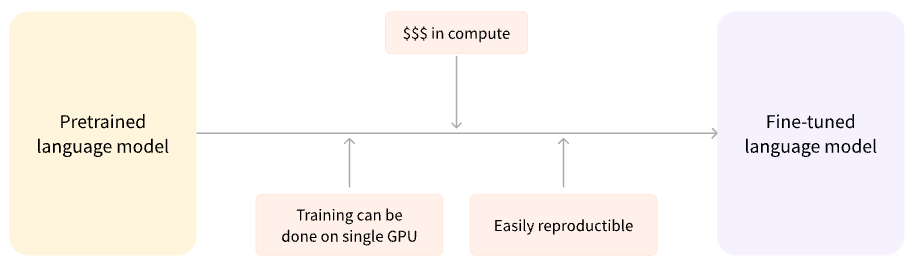

# Install

In [1]:
!pip install transformers

# [Transformer Model](https://huggingface.co/docs/transformers/main_classes/model)
- `인코더(Encoder) (왼쪽)`: 인코더는 입력에 대한 표현(representation) 혹은 자질(feature)을 도출합니다. 이는 모델이 입력으로부터 이해를 얻도록(acquire understanding from the input), 다시 말해서, 최종 목적 태스크를 위해서 입력에 대한 표현 형태가 최적화되었음을 의미합니다.
- `디코더(Decoder) (오른쪽)`: 디코더는 인코더가 구성한 표현(representation) 혹은 자질(feature)을 다른 입력과 함께 사용하여 대상 시퀀스를 생성합니다. 이는 모델이 출력 생성(generating outputs)에 최적화되어 있음을 의미합니다.

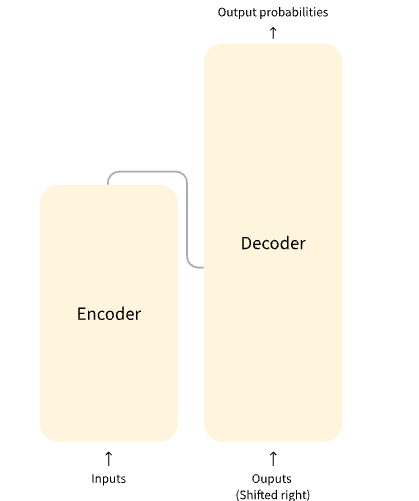

- Transformer 모델이 고수준(high-level)에서 어떻게 작동하는지 논의하고 전이 학습(transfer learning)과 미세 조정(fine-tuning)의 중요성에 대해 이야기했습니다.
- 가장 중요한 핵심은 대상 작업의 종류에 따라 전체 아키텍처(full architecture)를 사용하거나 인코더(encoder) 또는 디코더(decoder)만 사용할 수 있다는 것입니다.

다음 표는 이를 요약한 것입니다.

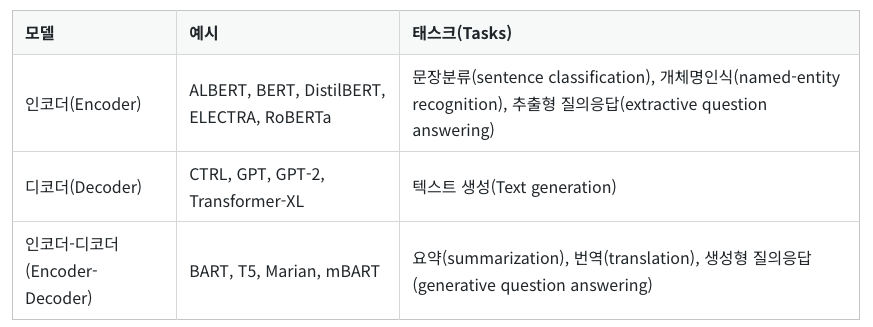

## Tokenizer
- 자연어(string)를 다차원 벡터(vector)로 변환하기 위해 먼저 토큰 단위로 잘라주는 작업을 Tokenization이라고 한다. 토큰으로 변환하는 기준은 여러가지다.
- 영어는 띄어쓰기를 기준으로 토큰화할 수 있을 것이다. 한국어는 형태소(morpheme)를 이용한 토큰화를 할 수 있을 것이다.

```shell
{'input_ids': [101, 1045, 2293, 17953, 2361, 999, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
```
- `input_ids`
  - tokenize된 token의 ID값이다. 즉, 미리 만들어진 단어 사전 리스트에서 해당 단어의 인덱스라고 생각하면 이해하기 쉽다.
- `token_type_ids`
  - tokenizer에 넣는 문장은 여러개 넣을 수 있다. 그래서 token_type_ids는 매개변수로 넣어진 문장 중 몇 번째 문장에 포함되어 있는지를 나타낸다. 하나의 문장만 넣으면 모두 첫번째 문장이므로 0(첫번째 문장을 의미)으로 표시된다. 문장을 두개 넣는다면 0,0,0,0...1,1,1,1 이런식으로 표현될 것이다.
- `attention_mask`
  - 0은 무시해도 되는 token, 1은 의미있는 token을 의미한다. 이때 무시해도 될 token이란 문장을 여러개 넣어줄 경우 문장들의 길이를 맞춰주기 위해 padding을 사용한다. 즉, 문장1이 3글자, 문장2이 5글자라면 문장1에 의미없는 padding을 2개 넣어준다는 것이다. 이런 padding이 attention_mask 0이다.

### special token

```shell
['[CLS]', 'i', 'love', 'nl', '##p', '!', '[SEP]']
I love NLP!
```

- padding token : PAD
- unknown token : UNK
- classifier token : CLS
- seperator token : SEP
- mask token : MASK

## Encoder Models
- `인코더 전용 모델(Encoder-only models)`: 문장 분류(sentence classification) 및 개체명 인식(named-entity recognition)과 같이 입력에 대한 분석 및 이해(understanding)가 필요한 태스크에 적합합니다.

### [ALBERT](https://huggingface.co/docs/transformers/model_doc/albert#albert)

#### [텍스트 분류](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/albert#transformers.AlbertForSequenceClassification)

- Example of single-label classification:

In [2]:
import torch
from transformers import AutoTokenizer, AlbertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("textattack/albert-base-v2-imdb")
model = AlbertForSequenceClassification.from_pretrained("textattack/albert-base-v2-imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

In [3]:
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

{'input_ids': tensor([[    2, 10975,    15,    51,  1952,    25, 10901,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [4]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [5]:
inputs

{'input_ids': tensor([[    2, 10975,    15,    51,  1952,    25, 10901,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [6]:
with torch.no_grad():
    logits = model(**inputs).logits

logits

tensor([[-1.0228,  1.0410]])

In [7]:
predicted_class_id = logits.argmax().item()

predicted_class_id

1

In [8]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [13]:
model.config.id2label[predicted_class_id]

'LABEL_1'

#### [토큰 분류](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/albert#transformers.AlbertForTokenClassification)

In [14]:
from transformers import AutoTokenizer, AlbertForTokenClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AlbertForTokenClassification.from_pretrained("albert/albert-base-v2")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForTokenClassification were not initialized from the model checkpoint at albert/albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
inputs = tokenizer(
    "HuggingFace is a company based in Paris and New York", add_special_tokens=False, return_tensors="pt"
)

inputs

{'input_ids': tensor([[20676,  6413,    25,    21,   237,   432,    19,  1162,    17,    78,
           305]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [16]:
with torch.no_grad():
    logits = model(**inputs).logits

logits

tensor([[[-0.1619,  0.2139],
         [-0.0966,  0.1986],
         [-0.0894,  0.2054],
         [-0.0966,  0.2018],
         [-0.0961,  0.1962],
         [-0.0930,  0.1873],
         [-0.0952,  0.1828],
         [-0.0849,  0.1769],
         [-0.0909,  0.1772],
         [-0.0871,  0.1871],
         [-0.0919,  0.1950]]])

In [17]:
predicted_token_class_ids = logits.argmax(-1)

predicted_token_class_ids

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [18]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [19]:
# Note that tokens are classified rather then input words which means that
# there might be more predicted token classes than words.
# Multiple token classes might account for the same word
predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids[0]]

predicted_tokens_classes

['LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1']

#### [필 마스크](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/albert#transformers.AlbertForMaskedLM)

In [20]:
import torch
from transformers import AutoTokenizer, AlbertForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AlbertForMaskedLM.from_pretrained("albert/albert-base-v2")

Some weights of the model checkpoint at albert/albert-base-v2 were not used when initializing AlbertForMaskedLM: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
# add mask_token
inputs = tokenizer("The capital of [MASK] is Paris.", return_tensors="pt")
inputs

{'input_ids': tensor([[   2,   14, 1057,   16,    4,   25, 1162,    9,    3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [22]:
with torch.no_grad():
    logits = model(**inputs).logits

logits

tensor([[[  4.3750,   1.3316,  -5.8527,  ...,  -4.8221,  -7.8826,  -5.5600],
         [ -3.0073,   3.5277,  -6.1227,  ...,  -8.7718, -14.0808,  -4.1364],
         [ -9.2652,   2.8095,  -7.7727,  ...,  -4.9893,  -4.9576,   1.2887],
         ...,
         [  0.4249,  -0.9373,  -3.8264,  ...,  -4.2670,  -2.2405,  -1.0696],
         [ -0.8150,   3.4991,   3.9915,  ...,   0.0695,  -3.6325,   1.3570],
         [  0.6825,   3.3002,  -5.8621,  ...,  -4.4281,  -3.3962,  -3.6946]]])

In [23]:
tokenizer.mask_token_id # 마스크 토큰

4

In [24]:
# retrieve index of [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

mask_token_index # 마스크 토큰 위치

tensor([4])

In [25]:
predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)

predicted_token_id

tensor([714])

In [26]:
tokenizer.decode(predicted_token_id)

'france'

#### [질문 답변](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/albert#transformers.AlbertForQuestionAnswering)

In [27]:
from transformers import AutoTokenizer, AlbertForQuestionAnswering
import torch

tokenizer = AutoTokenizer.from_pretrained("twmkn9/albert-base-v2-squad2")
model = AlbertForQuestionAnswering.from_pretrained("twmkn9/albert-base-v2-squad2")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

Some weights of the model checkpoint at twmkn9/albert-base-v2-squad2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")

inputs

{'input_ids': tensor([[    2,    72,    23,  2170, 27674,    60,     3,  2170, 27674,    23,
            21,  2210, 10956,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [29]:
with torch.no_grad():
    outputs = model(**inputs)

outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 2.5157, -2.5008, -5.8645, -2.5400, -3.3692, -7.4207, -1.7457,  4.6775,
          0.7935,  3.0249, 10.0460,  5.7510,  6.3791, -1.7457]]), end_logits=tensor([[ 2.4097, -4.7481, -6.2671, -6.4717, -3.1903, -6.1005, -2.1936, -3.5937,
         -1.4398, -4.3091,  1.5517,  0.8198,  8.8160, -2.1936]]), hidden_states=None, attentions=None)

In [30]:
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

answer_start_index, answer_end_index

(tensor(10), tensor(12))

In [31]:
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]

predict_answer_tokens

tensor([   21,  2210, 10956])

In [32]:
tokenizer.decode(predict_answer_tokens, skip_special_tokens=True)

'a nice puppet'

## Decoder Models
- `디코더 전용 모델(Decoder-only models)`: 텍스트 생성(text generation) 등과 같은 생성 태스크(generative tasks)에 좋습니다.

### [GPT - 텍스트 생성](https://littlefoxdiary.tistory.com/46)

In [50]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [51]:
# add the EOS token as PAD token to avoid warnings
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(torch_device)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [52]:
# encode context the generation is conditioned on
model_inputs = tokenizer('I enjoy walking with my cute dog', return_tensors='pt').to(torch_device)

model_inputs

{'input_ids': tensor([[   40,  2883,  6155,   351,   616, 13779,  3290]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

#### Greedy search
- 타임스텝 t에서 가장 높은 확률을 가지는 토큰을 다음 토큰으로 선택하는 전략
- Greedy Search 전략은 직관적이며, 짧은 텍스트를 생성할 때 괜찮은 전략이다.
- 이 전략을 통해 생성한 문장은 그럴듯하지만, 모델은 어느 순간 (꽤 빠른 시점부터) 같은 단어를 생성하기 시작한다.
- 이러한 동어 반복 문제는 자연어 생성에서 자주 발생하는 문제이지만, greedy & beam search에서 특히 자주 발생한다.
- 또한, 매 스텝에서 최고 확률의 토큰을 선택하는 이 전략은 최종 문장의 관점에서 최적이 아닐 수 있다.

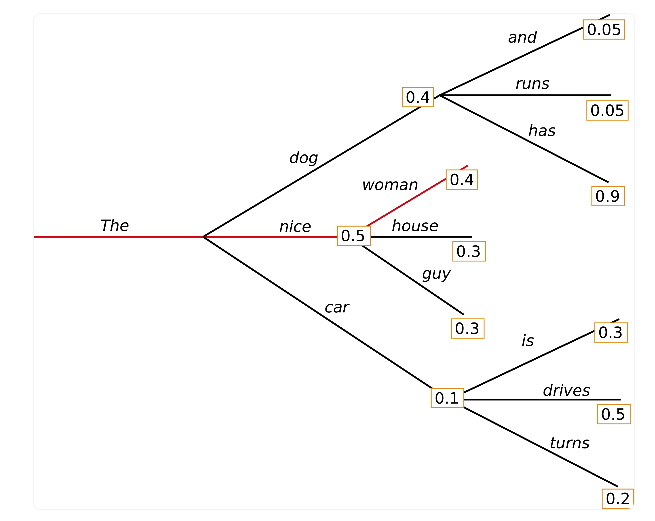

In [53]:
# generate 40 new tokens
greedy_output = model.generate(**model_inputs, max_new_tokens=40)

greedy_output

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[   40,  2883,  6155,   351,   616, 13779,  3290,    11,   475,   314,
          1101,   407,  1654,   611,   314,  1183,  1683,   307,  1498,   284,
          2513,   351,   616,  3290,    13,   314,  1101,   407,  1654,   611,
           314,  1183,  1683,   307,  1498,   284,  2513,   351,   616,  3290,
            13,   198,   198,    40,  1101,   407,  1654]], device='cuda:0')

In [54]:
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure


#### Beam search
- 각 타임스텝에서 가장 가능성 있는 num_beams개의 시퀀스를 유지하고, 최종적으로 가장 확률이 높은 가설을 선택하는 방법
- Greedy search가 숨겨 있는 높은 확률의 토큰을 놓칠 수 있다는 단점을 보완하기 위해 고안된 방법
- 언제나 Greedy search보다 높은 확률의 시퀀스를 찾게 되지만, 여전히 최선의 아웃풋을 보장하지는 않는다.

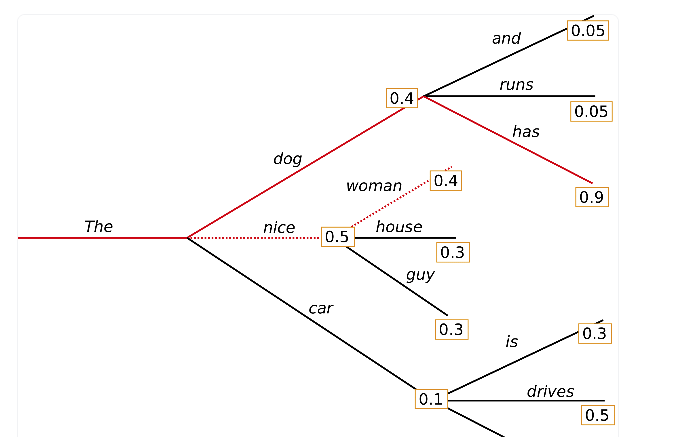

In [55]:
# activate beam search and early_stopping
beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5, # beam search
    early_stopping=True
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [56]:
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again. I'm not sure


#### n-gram 패널티 주기
- 동어 반복을 피하고 좀더 자연스러운 문장을 생성하기 위해 n-grams 페널티 전략을 적용할 수 있다.
- n-gram 단위의 어구가 두 번 등장할 일이 없도록, 이러한 일이 발생할 확률을 0으로 만드는 전략이다.
- 코드상에서는 아래와 같이 `no_repeat_ngram_size` 옵션을 설정함으로써 구현할 수 있다.
- 이 전략을 이용하면 훨씬 자연스러운 문장을 생성할 수 있지만, 텍스트 전체에서 n-gram으로 설정한 단어가 한 번만 등장할 수 있기 때문에 주의해서 사용해야 한다. 예를 들어 '서울 시청'에 대한 주제로 글을 쓰는데, no_repeat_ngram_size = 2로 설정하면 전체 글에서 '서울 시청'이라는 말은 한 번밖에 사용하지 못하기 때문이다!

In [57]:
# set no_repeat_ngram_size to 2
beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    no_repeat_ngram_size=2, # 페널티
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to


#### beam search에서 k개의 beam을 모두 리턴하기
- beam을 유지하며 디코딩한 시퀀스 중 가장 높은 확률을 가지는 k의 시퀀스를 모두 리턴해 마음에 드는 것을 사용하는 전략
- 코드에서는 `num_return_sequences` 옵션을 통해 구현 가능. 이 때 이 값은 num_beams보다 작거나 같아야 한다.
- 하지만, 모델이 자유롭게 글을 생성하는 `<open-ended 생성>`에서는 beam search가 최선의 전략은 아닐 수 있다:
  - beam search는 기계번역이나 요약정도에는 잘 작동하지만, 생성해야 하는 텍스트의 길이가 긴 대화 혹은 스토리를 생성해야 하는 open-ended 생성에서는 좋지 않다는 연구 결과가 있다.
  - beam search는 동어반복 문제가 심한 편인데, n-gram 페널티 전략으로는 '반복 없음'과 '적절한 시점에 동일한 단어를 재사용'하는 중간 지점을 찾기 어렵다.
  - 인간이 사용하는 언어를 놓고 보면, 모델이 생각하기에 가장 높은 확률을 가지는 단어가 늘 다음에 오는 것은 아니다. 마치 사람이 쓴 것과 같이 자연스럽기 위해서는 너무 예측 가능한 나머지 뻔하지만은 않은, '놀라운' 단어를 생성해낼 필요도 있다.

In [58]:
# set return_num_sequences > 1
beam_outputs = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    no_repeat_ngram_size=2,
    num_return_sequences=5,
    early_stopping=True
)

# now we have 3 output sequences
print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to
1: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to
2: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's a good idea to
3: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time to take a
4: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's a good idea

#### do_sample
- 모델이 생각하는 다음에 올 토큰에 대한 확률분포에 따라 단어를 샘플링하는 방식으로 디코딩하는 전략
- 이 전략을 사용하면 각 타임스텝에서 모델이 예측한 토큰의 확률분포를 이용해 토큰을 샘플링해 문장을 완성한다.

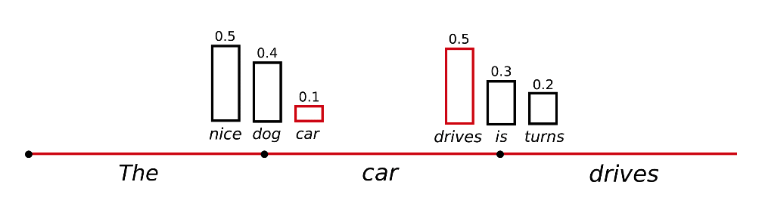

In [59]:
# set seed to reproduce results. Feel free to change the seed though to get different results
from transformers import set_seed
set_seed(42)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    do_sample=True, # 샘플링 사용
    top_k=0 #top_k=0으로 설정하면 타임스텝별로 하나의 토큰만 샘플링
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog for the rest of the day, but this had me staying in an unusual room and not going on nights out with friends (which will always be wondered for a mere minute or so at this point).


- 하지만 모델이 만들어낸 확률은 smooth한 나머지, 낮은 확률의 토큰이 "지나치게 잘" 샘플링될 수 있고, 이렇게 되면 어색한 문장이 만들어질 수 있다.
- 따라서 모델이 배출한 분포에서 높은 값을 가지는 확률을 더 뾰족하게 만드는 temperature 스케일링을 사용한다.

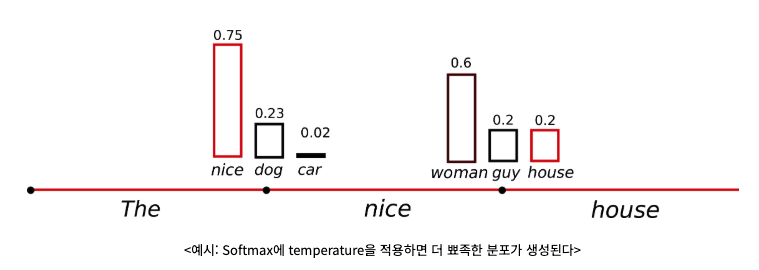

In [60]:
# set seed to reproduce results. Feel free to change the seed though to get different results
set_seed(42)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    do_sample=True,
    top_k=0,
    temperature=0.6,
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I don't like to chew on it. I like to eat it and not chew on it. I like to be able to walk with my dog."

So how did you decide


#### Top-k Sampling

- 가장 확률이 높은 K개의 '다음 단어들'을 필터링하고, 확률 질량을 해당 K개의 '다음 단어들'에 대해 재분배하는 전략
- 이는 GPT-2에서 선택한 디코딩 전략으로, 스토리 생성에서 큰 효과를 보인 방법이다.
- 예를 들어 아래 그림은 K=6으로 셋팅한 top-k샘플링을 보여준다. 각 샘플링 스텝에서 샘플링할 풀이 6개로 제한된다. 이때 6개의 가장 확률이 높은 단어 집합을 $V_{top-K}$로 표현하면, 첫 번째 타임스텝에서는 전체 확률에서 0.68정도에 해당하는 단어에서 디코딩하지만, 두 번째 타임스텝에서는 가능한 대부분의 토큰(0.99)을 아우르는 동시에, 너무 이상한 토큰들(a, not, the 등..)은 아예 제외할 수 있다.

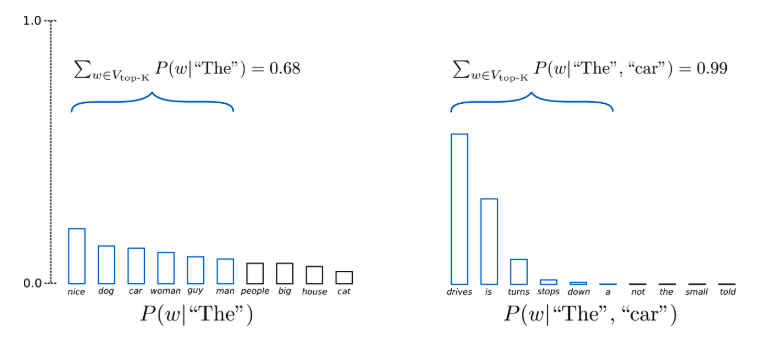

- 코드상에서는 top_k 옵션을 0이 아닌 50과 같은 숫자로 주어 top-k 샘플링을 쉽게 구현할 수 있다.
- 단, 이 방법은 다음 토큰으로 필터링된 k의 단어를 아주 효과적으로 활용하지 못 할 수 있다는 우려가 있다. 그림에서 보여주는 예시만 보아도, 첫 번째 단어는 꽤나 평평한 분포에서 샘플링을 하지만 두 번째 토큰은 sharp한 분포에서 샘플링을 하게 된다. 이로 인해 첫 번째 타임스텝에서는 꽤나 괜찮아보이는 (people, big, house, cat) 등의 후보는 전혀 고려되지 못하고, 두 번째 타임스텝에서는 낮은 확률이라도 뽑게 되면 어색해지는 (down, a) 등의 토큰이 샘플링 풀에 포함되게 된다. 즉, 이 방법은 모델의 창의성을 지나치게 저하하면서도 모델이 이상한 단어를 샘플링할 위험이 있는 것이다.

In [61]:
# set seed to reproduce results. Feel free to change the seed though to get different results
set_seed(42)

# set top_k to 50
sample_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    do_sample=True, #샘플링 전략 사용
    top_k=50 # 확률 순위가 50위 밖인 토큰은 샘플링에서 제외
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog for the rest of the day, but this time it was hard for me to figure out what to do with it. (One reason I asked this for a few months back is that I had a


#### Top-p (nucleus) sampling
- 가능도 있는 k개의 단어로부터 샘플링하는 대신, 누적 확률이 확률 p에 다다르는 최소한의 단어 집합으로부터 샘플링
- 가장 높은 확률을 가지는 토큰부터 시작해, 확률 값의 합이 top-p로 설정한 값을 넘을 때까지 샘플링 풀에 토큰을 추가한다.

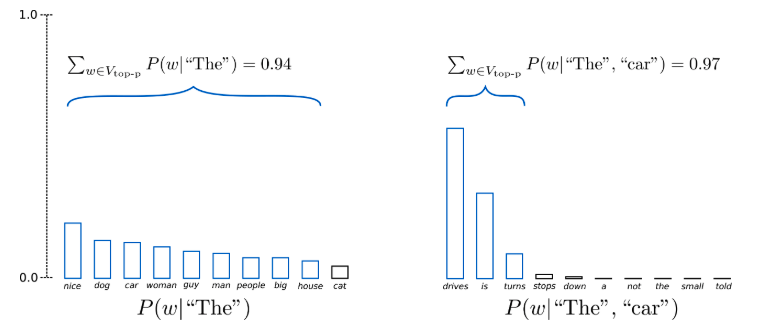

- 확률이 비교적 평평했던 첫 번째 타임스텝에서는 가능성 있는 (nice, dog, ..., big, house)까지 총 9개의 토큰을 샘플링 풀에 넣어야 누적확률 0.94를 채울 수 있었다. 하지만 분포가 가팔랐던 두 번째 타임스텝에서는 확률이 굉장히 높은 (drives, is, turns)에서만 샘플링하게 되고, 이상한 토큰을 샘플링할 확률이 훨씬 적어진다.
- 코드에서는 top_p 값을 0과 1 사이의 값으로 설정하면 된다.

In [62]:
# set seed to reproduce results. Feel free to change the seed though to get different results
set_seed(42)

# set top_k to 50
sample_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    do_sample=True,
    top_p=0.92, #92%로 설정하고 샘플링하기
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog for the rest of the day, but this had me staying in an unusual room and not going on nights out with friends (which will always be my yearning for such a spacious screen on my desk


## Sequence-to-sequence Models
- `인코더-디코더 모델(Encoder-Decoder models) 혹은 시퀀스-투-시퀀스 모델(sequence-to-sequence model)`: 번역(translation)이나 요약(summarization)과 같이 입력이 수반되는 생성 태스크(generative tasks)에 적합합니다.

### [BART](https://huggingface.co/docs/transformers/model_doc/bart)

#### [토큰화](https://huggingface.co/docs/transformers/model_doc/bart#transformers.BartTokenizer)

In [33]:
from transformers import BartTokenizer

tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

In [34]:
tokenizer("Hello world")

{'input_ids': [0, 31414, 232, 2], 'attention_mask': [1, 1, 1, 1]}

In [35]:
tokenizer(["Hello world", " Hello world"])

{'input_ids': [[0, 31414, 232, 2], [0, 20920, 232, 2]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1, 1]]}

#### [요약](https://huggingface.co/docs/transformers/model_doc/bart#transformers.BartForConditionalGeneration.forward.example)

In [36]:
from transformers import AutoTokenizer, BartForConditionalGeneration

model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [37]:
ARTICLE_TO_SUMMARIZE = (
    "PG&E stated it scheduled the blackouts in response to forecasts for high winds "
    "amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were "
    "scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."
)

ARTICLE_TO_SUMMARIZE

'PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow.'

In [38]:
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors="pt")

inputs

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


{'input_ids': tensor([[    0,  8332,   947,   717,  2305,    24,  1768,     5,   909,  4518,
            11,  1263,     7,  5876,    13,   239,  2372,  2876,  3841,  1274,
             4,    20,  4374,    16,     7,  1888,     5,   810,     9, 12584,
             4,  9221,  5735,  7673,   916,    58,  1768,     7,    28,  2132,
            30,     5,  2572, 10816,    61,    58,   421,     7,    94,   149,
            23,   513, 15372,  3859,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [39]:
# Generate Summary
summary_ids = model.generate(inputs["input_ids"], num_beams=2, min_length=0, max_length=20)

summary_ids

tensor([[   2,    0, 8332,  947,  717, 1768,    5,  909, 4518,   11, 1263,    7,
         5876,   13,  239, 2372, 2876, 3841, 1274,    2]])

In [40]:
tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

'PG&E scheduled the blackouts in response to forecasts for high winds amid dry conditions'

#### [필 마스크](https://huggingface.co/docs/transformers/model_doc/bart#transformers.BartForConditionalGeneration.forward.example-2)

In [41]:
from transformers import AutoTokenizer, BartForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [42]:
TXT = "My friends are <mask> but they eat too many carbs."
inputs = tokenizer([TXT], return_tensors="pt")

inputs

{'input_ids': tensor([[    0,  2387,   964,    32, 50264,    53,    51,  3529,   350,   171,
         33237,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [43]:
input_ids = inputs["input_ids"]
logits = model(input_ids).logits

logits

tensor([[[34.6802,  6.9836, 16.3400,  ...,  7.2211,  7.0561,  2.3689],
         [ 5.8346, -3.1657, 14.5902,  ..., -1.0895, -0.5840,  1.0089],
         [-7.2457, -5.1547,  6.5578,  ..., -4.3999, -3.6170,  0.2360],
         ...,
         [-3.2509, -4.5113,  6.5780,  ..., -4.1401, -3.9725,  1.0122],
         [-0.5660, -4.0633, 13.1334,  ..., -1.8695, -1.9459,  1.2657],
         [-1.5064, -3.5157, 22.3739,  ..., -3.6222, -3.3043, -0.4648]]],
       grad_fn=<AddBackward0>)

In [44]:
masked_index = (input_ids[0] == tokenizer.mask_token_id).nonzero().item()
masked_index

4

In [45]:
probs = logits[0, masked_index].softmax(dim=0)
values, predictions = probs.topk(5)

tokenizer.decode(predictions).split()

['not', 'good', 'healthy', 'great', 'very']

#### [질문 답변](https://huggingface.co/docs/transformers/model_doc/bart#transformers.BartForQuestionAnswering)

In [46]:
from transformers import AutoTokenizer, BartForQuestionAnswering
import torch

tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-finetuned-squadv1")
model = BartForQuestionAnswering.from_pretrained("valhalla/bart-large-finetuned-squadv1")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [47]:
question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")

inputs

{'input_ids': tensor([[    0, 12375,    21,  2488,   289, 13919,   116,     2,     2, 24021,
           289, 13919,    21,    10,  2579, 29771,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [48]:
with torch.no_grad():
    outputs = model(**inputs)

answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

answer_start_index, answer_end_index

(tensor(14), tensor(15))

In [49]:
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens, skip_special_tokens=True)

' nice puppet'

### [MarianMT - 번역](https://huggingface.co/docs/transformers/model_doc/marian#transformers.MarianMTModel)

In [ ]:
from transformers import AutoTokenizer, MarianMTModel

src = "ko"  # source language
trg = "en"  # target language

model_name = f"Helsinki-NLP/opus-mt-{src}-{trg}"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
sample_text = "버스 정류장이 어디인가요?"
batch = tokenizer([sample_text], return_tensors="pt")

generated_ids = model.generate(**batch)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

"Where's the bus stop?"

In [ ]:
src = "fr"  # source language
trg = "en"  # target language

model_name = f"Helsinki-NLP/opus-mt-{src}-{trg}"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

In [ ]:
sample_text = "où est l'arrêt de bus ?"
batch = tokenizer([sample_text], return_tensors="pt")

generated_ids = model.generate(**batch)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

"Where's the bus stop?"

### [T5 - 대화](https://youngchannel.co.kr/aistudy/T5-%ED%8C%8C%EC%9D%B8%ED%8A%9C%EB%8B%9D%EC%9C%BC%EB%A1%9C-%EC%B9%9C%EA%B7%BC%ED%95%9C-%EB%8C%80%ED%99%94%ED%98%95-%EC%B1%97%EB%B4%87-%EB%A7%8C%EB%93%A4%EA%B8%B0)

In [ ]:
import torch
from transformers import T5TokenizerFast, T5ForConditionalGeneration

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tokenizer = T5TokenizerFast.from_pretrained("paust/pko-chat-t5-large")
model = T5ForConditionalGeneration.from_pretrained("paust/pko-chat-t5-large")
model.to(device)

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.64G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(50358, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(50358, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=1024, out_features=2816, bias=False)
              (wi_1): Linear(in_features=1024, out_features=2816, bias=False)
       

In [ ]:
prompt_tpl = "사용자가 한 말을 읽고 그에 질문에 답하거나 명령에 응답하는 비서입니다.\n\n사용자:\n{text}\n\n비서:\n"
prompt = prompt_tpl.format(text="한국의 수도는 어디인가요?")

prompt

'사용자가 한 말을 읽고 그에 질문에 답하거나 명령에 응답하는 비서입니다.\n\n사용자:\n한국의 수도는 어디인가요?\n\n비서:\n'

In [ ]:
input_ids = tokenizer(prompt, return_tensors='pt').input_ids.to(device)

input_ids

tensor([[ 708, 4914,  222,  305,  222,  457,  291,  222, 4559,  222,  337,  279,
          222, 1141,  279,  222,  703, 2285,  222, 4984,  279,  222, 5298,  429,
          222, 6528,  535,   15,  200,  200,  708,  330,   27,  200,  831,  302,
          222, 2647,  274,  222, 1187, 1269,  296,   32,  200,  200, 6528,   27,
          200,    1]], device='cuda:0')

In [ ]:
logits = model.generate(
    input_ids,
    max_length=1024,
    temperature=0.5,
    no_repeat_ngram_size=6,
    do_sample=True,
    num_return_sequences=1,
)

In [ ]:
text = tokenizer.batch_decode(logits, skip_special_tokens=True)[0]
print(text)  # 한국의 수도는 서울입니다.

한국의 수도는 서울입니다.


# [Transformer NLP Task별 모델](https://huggingface.co/learn/nlp-course/ko/chapter2/2?fw=pt#model-heads-making-sense-out-of-numbers)
- 모델 헤드는 hidden state의 고차원 벡터를 입력으로 받아 다른 차원으로 투영합니다. 모델 헤드는 보통 하나 이상의 선형 레이어로 이루어져 있습니다.

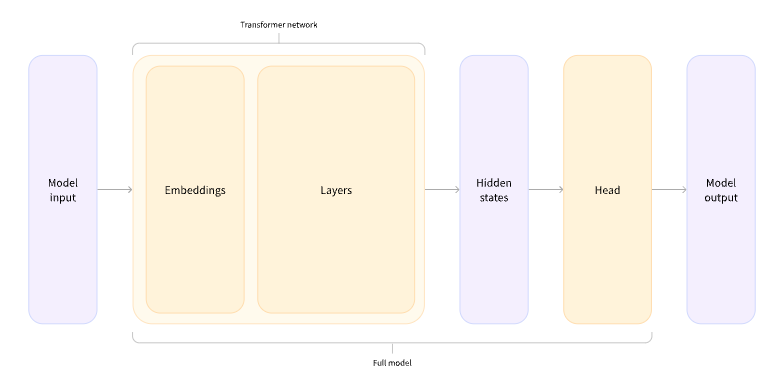

- Transformer 모델의 출력은 처리할 모델 헤드로 바로 전달됩니다.
- 이 다이어그램에서, 모델은 모델의 임베딩 레이어와 후속 레이어로 표현됩니다. 임베딩 레이어는 토큰화된 각각의 입력 ID를 연관된 토큰을 나타내는 벡터로 변환합니다. 후속 레이어는 문장의 최종 표현을 만들기 위해 어텐션 메커니즘을 이용해 이 벡터들을 처리합니다.

Transformer에는 다양한 아키텍처가 있으며, 각각의 아키텍처는 특정 작업을 처리하도록 설계되었습니다. 아래는 일부 아키텍처입니다.

## [Text Classification](https://huggingface.co/docs/transformers/tasks/sequence_classification)
- `*ForSequenceClassification`: 텍스트 분류는 텍스트에 레이블이나 클래스를 지정하는 Task

In [63]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("stevhliu/my_awesome_model")

text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."
inputs = tokenizer(text, return_tensors="pt")

inputs

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'input_ids': tensor([[  101,  2023,  2001,  1037, 17743,  1012,  2025,  3294, 11633,  2000,
          1996,  2808,  1010,  2021,  4372,  2705,  7941,  2989,  2013,  2927,
          2000,  2203,  1012,  2453,  2022,  2026,  5440,  1997,  1996,  2093,
          1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [64]:
import torch
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("stevhliu/my_awesome_model")

# 모델 예측
with torch.no_grad():
    logits = model(**inputs).logits

config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [65]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'LABEL_1'

## [Token Classification](https://huggingface.co/docs/transformers/tasks/token_classification)
- `*ForTokenClassification`: 토큰 분류는 문장의 개별 토큰에 라벨을 지정하는 Task

In [66]:
text = "The Golden State Warriors are an American professional basketball team based in San Francisco."


In [67]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("stevhliu/my_awesome_wnut_model")
inputs = tokenizer(text, return_tensors="pt")

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [68]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("stevhliu/my_awesome_wnut_model")

with torch.no_grad():
    logits = model(**inputs).logits

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/266M [00:00<?, ?B/s]

In [70]:
text

'The Golden State Warriors are an American professional basketball team based in San Francisco.'

In [69]:
predictions = torch.argmax(logits, dim=2)
predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]
predicted_token_class

['O',
 'O',
 'B-location',
 'I-location',
 'B-group',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-location',
 'B-location',
 'O',
 'O']

## [Question Answering](https://huggingface.co/docs/transformers/tasks/question_answering)
- `*ForQuestionAnswering`: 질문 답변 작업은 질문에 대한 답변을 반환하는 Task

In [71]:
question = "How many programming languages does BLOOM support?"
context = "BLOOM has 176 billion parameters and can generate text in 46 languages natural languages and 13 programming languages."


In [72]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
inputs = tokenizer(question, context, return_tensors="pt")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [73]:
inputs

{'input_ids': tensor([[  101,  2129,  2116,  4730,  4155,  2515, 13426,  2490,  1029,   102,
         13426,  2038, 18561,  4551, 11709,  1998,  2064,  9699,  3793,  1999,
          4805,  4155,  3019,  4155,  1998,  2410,  4730,  4155,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}

In [74]:
import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained("distilbert/distilbert-base-uncased")

with torch.no_grad():
    outputs = model(**inputs)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

In [76]:
answer_start_index, answer_end_index

(tensor(9), tensor(0))

In [77]:
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

''

## [Causal Language Modeling](https://huggingface.co/docs/transformers/tasks/language_modeling)
- `*ForCausalLM`: 텍스트 생성 Task

In [78]:
prompt = "Somatic hypermutation allows the immune system to"

In [79]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilgpt2")
inputs = tokenizer(prompt, return_tensors="pt").input_ids

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [80]:
inputs

tensor([[   50, 13730,  8718,    76,  7094,  3578,   262, 10900,  1080,   284]])

In [81]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("distilbert/distilgpt2")

# generate -> 문장 생성
outputs = model.generate(inputs,
                         max_new_tokens=100,
                         do_sample=True,
                         top_k=50,
                         top_p=0.95)

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [82]:
outputs

tensor([[   50, 13730,  8718,    76,  7094,  3578,   262, 10900,  1080,   284,
         39119,  2512,   257,  3108,  6644,   884,   355,   281,   395,  3202,
          1143,  1582,    66,  7230,    13,  6660,    11,   262,  4165,  3061,
           286,   428,  2050,   373,   284,  4659,   262,  5408,   286,   262,
          7532,   290,   262,  3108, 15147,  2882,   284,   262,  8718,    76,
          7094,    13,  3423,    11,   356, 12565,   262,  5408,   286,  7514,
         15539,   291,  7408,   357,  5662,    32,     8,   290,  7514, 30584,
         10641,  1460,   357,    47,  4090,   828,   543,   389,  6241,   287,
          3294,  7652,  1141,   257,  2060,  6772,   286,  8718,    76,  7094,
            13, 12280, 30584, 10641,  1460,   326,  3802,   262,  2685,  2884,
           262,   279,   382,   547, 13906,   416,   350,  4090,    11,   543]])

In [83]:
result = tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [84]:
print(result)

['Somatic hypermutation allows the immune system to selectively block a pathogen such as anesthetized parcumin. Thus, the primary goal of this study was to assess the expression of the protein and the pathogenic response to the hypermutation. Here, we investigated the expression of polycyclic acid (PCA) and polysaccharides (PSA), which are expressed in multiple regions during a single cycle of hypermutation. Polysaccharides that enter the cell via the pore were activated by PSA, which']


## [Masked Language Modeling](https://huggingface.co/docs/transformers/tasks/masked_language_modeling)
- `*ForMaskedLM`: 마스킹된 Token 예측하는 Task

In [85]:
text = "The Milky Way is a <mask> galaxy."

In [86]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilroberta-base")
inputs = tokenizer(text, return_tensors="pt")
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [87]:
from transformers import AutoModelForMaskedLM

model = AutoModelForMaskedLM.from_pretrained("distilbert/distilroberta-base")

# 모델 예측
logits = model(**inputs).logits

# 결과 확인
mask_token_logits = logits[0, mask_token_index, :]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [88]:
mask_token_logits.shape

torch.Size([1, 50265])

In [89]:
top_3_tokens = torch.topk(mask_token_logits, 3, dim=1).indices[0].tolist()

for token in top_3_tokens:
    print(text.replace(tokenizer.mask_token, tokenizer.decode([token])))

The Milky Way is a  spiral galaxy.
The Milky Way is a  dwarf galaxy.
The Milky Way is a  massive galaxy.


## [Translation](https://huggingface.co/docs/transformers/tasks/translation)
- `*ForSeq2SeqLM`: 번역 Task

In [92]:
text = "translate English to French: Legumes share resources with nitrogen-fixing bacteria."


In [93]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
inputs = tokenizer(text, return_tensors="pt").input_ids

In [94]:
inputs

tensor([[13959,  1566,    12,  2379,    10,   312,  1744,  2687,   698,  1438,
            28, 23383,    18, 12304,    53,  8710,     5,     1]])

In [95]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")


outputs = model.generate(inputs,
                         max_new_tokens=40,
                         do_sample=True, top_k=30, top_p=0.95)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [96]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

"Les lègumes ont accès à des ressources avec des bactéries fixateurs d'azote."

## [Summarization](https://huggingface.co/docs/transformers/tasks/summarization)
- `*ForSeq2SeqLM`:요약 Taks

In [97]:
text = """
summarize:
The Inflation Reduction Act lowers prescription drug costs, health care costs, and energy costs.
It's the most aggressive action on tackling the climate crisis in American history, which will lift up American workers and create good-paying, union jobs across the country.
It'll lower the deficit and ask the ultra-wealthy and corporations to pay their fair share.
And no one making under $400,000 per year will pay a penny more in taxes.
"""


In [98]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
inputs = tokenizer(text, return_tensors="pt").input_ids

In [99]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")
outputs = model.generate(inputs, max_new_tokens=100, do_sample=False)

In [100]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

"the inflation reduction act lowers prescription drug costs, health care costs, and energy costs. it's the most aggressive action on tackling the climate crisis in american history. it will ask the ultra-wealthy and corporations to pay their fair share."

## [Multiple Choice](https://huggingface.co/docs/transformers/tasks/multiple_choice)
- `*ForMultipleChoice`: 객관식 과제는 질의 응답과 비슷하지만, 몇 가지 후보 답변이 맥락과 함께 제공되고 모델이 올바른 답변을 선택하는 Task

In [101]:
prompt = "France has a bread law, Le Décret Pain, with strict rules on what is allowed in a traditional baguette."
candidate1 = "The law does not apply to croissants and brioche."
candidate2 = "The law applies to baguettes."

In [102]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
inputs = tokenizer([[prompt, candidate1], [prompt, candidate2]], return_tensors="pt", padding=True)
labels = torch.tensor(0).unsqueeze(0)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [103]:
inputs

{'input_ids': tensor([[  101,  2605,  2038,  1037,  7852,  2375,  1010,  3393, 11703, 13465,
          3255,  1010,  2007,  9384,  3513,  2006,  2054,  2003,  3039,  1999,
          1037,  3151,  4524, 23361,  2618,  1012,   102,  1996,  2375,  2515,
          2025,  6611,  2000, 13675, 10054, 22341,  2015,  1998,  7987,  3695,
          5403,  1012,   102],
        [  101,  2605,  2038,  1037,  7852,  2375,  1010,  3393, 11703, 13465,
          3255,  1010,  2007,  9384,  3513,  2006,  2054,  2003,  3039,  1999,
          1037,  3151,  4524, 23361,  2618,  1012,   102,  1996,  2375, 12033,
          2000,  4524, 23361,  4570,  1012,   102,     0,     0,     0,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [104]:
labels

tensor([0])

In [105]:
from transformers import AutoModelForMultipleChoice

model = AutoModelForMultipleChoice.from_pretrained("google-bert/bert-base-uncased")
outputs = model(**{k: v.unsqueeze(0) for k, v in inputs.items()}, labels=labels)
logits = outputs.logits

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [106]:
predicted_class = logits.argmax().item()
predicted_class

0